In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data_df = pd.merge(mouse_metadata, study_results,
                            how='inner', on='Mouse ID')

# Display the data table for preview
combined_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
mice_count = combined_data_df["Mouse ID"].unique()
len(mice_count)

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_timepoint = combined_data_df.loc[combined_data_df.duplicated(subset=["Mouse ID","Timepoint"]),"Mouse ID"].unique()
duplicate_mice_timepoint

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
special_mouse = combined_data_df.loc[combined_data_df["Mouse ID"] == 'g989']
special_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_data_df2 = combined_data_df[combined_data_df["Mouse ID"].isin(duplicate_mice_timepoint)==False]
combined_data_df2

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
mice_count2 = combined_data_df2["Mouse ID"].unique()
len(mice_count2)

248

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
average_tumor = combined_data_df2.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]

median_tumor = combined_data_df2.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]

variance_tumor = combined_data_df2.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]

standard_deviation_tumor = combined_data_df2.groupby("Drug Regimen").std(ddof=1)["Tumor Volume (mm3)"]

SEM_tumor = combined_data_df2.groupby("Drug Regimen").sem(ddof=1)["Tumor Volume (mm3)"]


# This method is the most straighforward, creating multiple series and putting them all together at the end.

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_tumor = pd.DataFrame({"Mean": average_tumor, "Median": median_tumor, "Variance": variance_tumor,
                                      "Standard Deviation": standard_deviation_tumor, "SEM": SEM_tumor})
summary_tumor

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


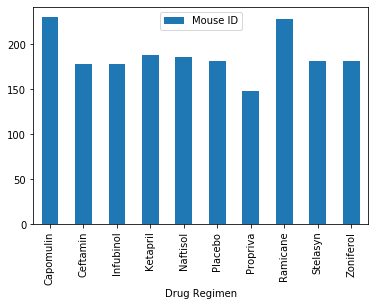

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
bar_df = pd.DataFrame(combined_data_df2.groupby(["Drug Regimen"]).count()).reset_index()

drug_regimen_data = bar_df[["Drug Regimen", "Mouse ID"]]

drug_regimen_data = drug_regimen_data.set_index("Drug Regimen")

drug_regimen_data.plot(kind = "bar")

<BarContainer object of 10 artists>

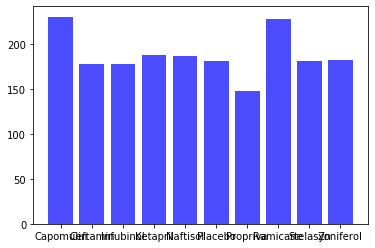

In [99]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_axis = summary_tumor.index.unique()
y_axis = (combined_data_df2.groupby(["Drug Regimen"])["Mouse ID"].count())

plt.bar(x_axis, y_axis, color='b', alpha=0.7, align="center")

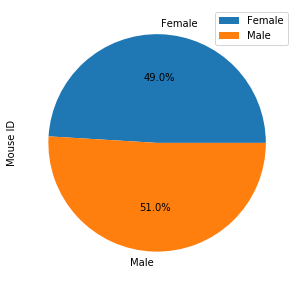

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
df4 = pd.DataFrame(combined_data_df2.groupby(["Sex"]).count())
df4 = df4.drop(columns=["Drug Regimen","Age_months","Weight (g)","Timepoint","Tumor Volume (mm3)","Metastatic Sites"])

df4.plot.pie(y='Mouse ID', autopct='%1.1f%%', labels=['Female','Male'], figsize=(5, 5))

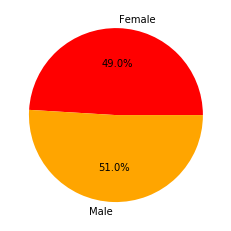

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
df5 = (combined_data_df2.groupby(["Sex"])["Mouse ID"].count())


labels=["Female", "Male"]
colors=["red", "orange"]

plt.pie(df5, labels=labels, colors=colors,
        autopct="%1.1f%%")

plt.show()

In [102]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

fig1, ax1 = plt.subplots(df5["Tumor Volume (mm3)"])

ax1.boxplot()
plt.show()

KeyError: 'Tumor Volume (mm3)'

In [97]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = df5.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of volume is: {lowerq}")
print(f"The upper quartile of volume is: {upperq}")
print(f"The interquartile range of volume is: {iqr}")
print(f"The the median of volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of volume is: 931.0
The upper quartile of volume is: 949.0
The interquartile range of volume is: 18.0
The the median of volume is: 940.0 
Values below 904.0 could be outliers.
Values above 976.0 could be outliers.


In [ ]:
   # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds

Text(0, 0.5, 'Volume (mm3)')

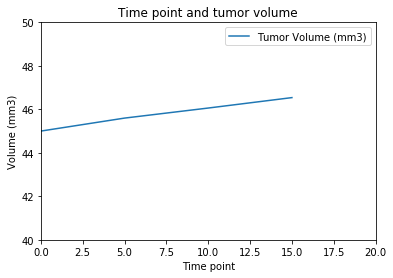

In [103]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
line_df = combined_data_df2.loc[combined_data_df2["Drug Regimen"] == "Capomulin"]

line_df = line_df.reset_index()

single_line_df = line_df.loc[line_df["Mouse ID"] == "r157"]

graph_single_df = single_line_df.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]

graph_single_df.set_index('Timepoint').plot()

plt.xlim(0,20)
plt.ylim(40,50)

plt.title("Time point and tumor volume")
plt.xlabel("Time point")
plt.ylabel("Volume (mm3)")

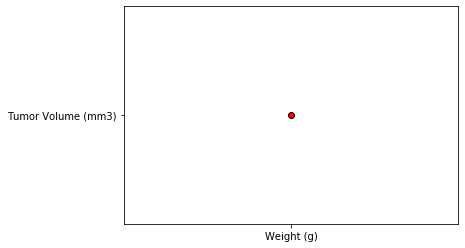

In [89]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
df7 = final_time_df.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]

df7 = pd.DataFrame(df7.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean())

plt.scatter("Weight (g)", "Tumor Volume (mm3)", marker="o", facecolors="red", edgecolors="black")

In [93]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

print(f"The correlation coefficient between mouse weight and average tumor volume is 
      {round((["Mouse ID","Tumor Volume (mm3)"])[0],1)}")

SyntaxError: EOL while scanning string literal (<ipython-input-93-bc4d70338bfa>, line 4)